# Building My First Binary Image Classifier
> Using FastAI to build a classifier on Hip X-rays

- categories: [jupyter]

## Hips and Knees and Spines, Oh My

The crux of my first project in this lab involved taking patients from the UK Biobank who had been diagnosed with hip osteoarthritis (OA) and attempting to train a classifier using machine learning (ML) on X-rays of these patients' hips. Hip OA is typically diagnosed by looking at X-rays of the hip, specifically looking at the hip-joint space between the hip and the pelvis as well as other diagnostic markers more clearly described [here](https://radiopaedia.org/articles/osteoarthritis-of-the-hip?lang=us). In the image below, the hip on the left side of the picture has OA while the right hip is normal.

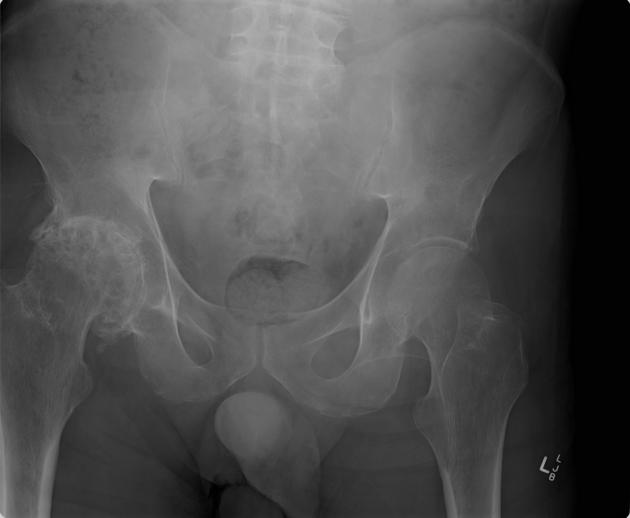

An added layer of depth to this project involved seeing if we could look at other X-rays or images from other body parts of these patients not typically used in diagnosing hip OA and whether or not these additional images could give some additional diagnostic clues or outcome predictors for hip OA. So if, for example, looking at only a hip X-ray for diagnosing hip OA had generally 85% accuracy, could looking at an X-ray of the spine improve diagnostic accuracy or tell us something about potential health outcomes for the patient. Though it seems unlikely for this particular disease, this line of thinking could be broadly applied to a variety of diseases. Say liver cancer is typically diagnosed through a liver MRI, but what if taking a brain CT scan alongside a liver MRI gave earlier diagnostic accuracy or could predict disease severity? Thinking along these lines, I set out to create and attempt to understand my first classifier - whether or not my model could predict if a patient had hip OA or not based upon just a hip X-ray.

## Obtaining the Images and Organizing Files

All DXA Images were obtained from the UK Biobank. Additionally, metadata files corresponding to patient hip OA diagnosis and other metadata were downloaded from the Biobank. A previous lab member had already obtained a set of 200 patients who had been diagnosed with hip OA and 200 patients without the diagnosis. I placed these patient folders containing the X-ray images into two separate folders, one labeled OA_200 and another labeled Not_OA_200. In order to distinguish between patients with hip OA versus those without, I wrote a bash script to rename all the patient folders in the OA_200 directory. 

(Ex: regular patient = 1000000_20158_2_0.zip, OA patient = OA_1000001_20158_2_0.zip)

```shell
#!/bin/bash
# This file will rename the OA zip files to include OA in the name

echo "Rename OA zip files so they begin with OA"


for f in *.zip; do
        nf="OA_"${f}
        mv -- "$f" "$nf"
done
```

I then unzipped the files using the code I wrote about in my last blog post. From here, I followed a [fastAI tutorial](https://docs.fast.ai/tutorial.medical_imaging.html) about binary classification of medical images and mimicked their workflow entirely. 

### Dicom Files - An Aside

"DICOM(Digital Imaging and COmmunications in Medicine) is the de-facto standard that establishes rules that allow medical images(X-Ray, MRI, CT) and associated information to be exchanged between imaging equipment from different vendors, computers, and hospitals. The DICOM format provides a suitable means that meets health infomation exchange (HIE) standards for transmision of health related data among facilites and HL7 standards which is the messaging standard that enables clinical applications to exchange data

DICOM files typically have a .dcm extension and provides a means of storing data in separate ‘tags’ such as patient information as well as image/pixel data. A DICOM file consists of a header and image data sets packed into a single file. By extracting data from these tags one can access important information regarding the patient demographics, study parameters, etc."

## Building The Classifier

First, a few Python libraries needed to be installed and imported to TACC. These libraries below are necessary for viewing dicom images and running the classifier according to the fastAI tutorial

In [1]:
#!pip install pydicom kornia opencv-python scikit-image nbdev
#from fastai.basics import *
#from fastai.callback.all import *
#from fastai.vision.all import *
#from fastai.medical.imaging import *
#import pydicom

The following libraries were used to easily navigate the directories in TACC and generate a csv from a pandas dataframe in order to mimic the file layout in the fastAI tutorial

In [2]:
#import pandas as pd
#import os
#import glob

My directory layout is as follows: 

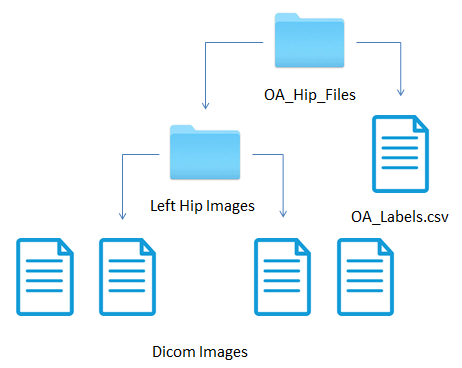

Based upon the file name which follows a certain nomenclature for determining what dicom image corresponds to what body part, I pulled only left hip images from the OA_200 and Not_OA_200 directories into LeftHipImages. When I pulled the images from OA_200 to the new directory, I renamed the files to begin with "OA_OA_" so that I could generate a label based upon filename for whether the image had a hip OA diagnosis or not. I used the following code to generate a pandas df which I turned into the OA_Labels.csv file.

In [3]:
# Puts all dicom images in HipImages into a list
#files = (glob.glob("/work2/08068/ekun/frontera/OA_Hip_Files/LeftHipImages/*.dcm"))

# Creates a dataframe and populates the first column "File" with the file names of the dicom images
#df = pd.DataFrame()
#df["File"] = files

# Looks at the file column in my dataframe and labels "OA" or "Not OA" accordingly 
# depending on if the file has "OA_OA_" in the name or not
#labels = []
#for image in df["File"]:
#    if "OA_OA_" in image:
#        labels.append("OA")
#    else:
#        labels.append("Not_OA")
#df["Label"] = labels

# Writes the dataframe to a csv file
#df.to_csv("/work2/08068/ekun/frontera/OA_Hip_Files/OA_Labels.csv", sep='\t', index = False)

The resulting dataframe looked like this

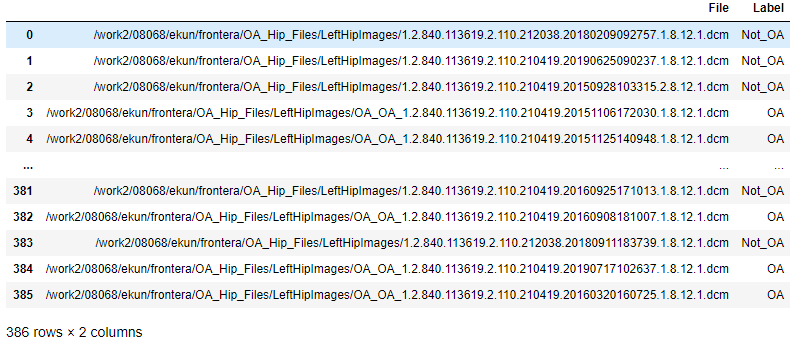

Most of the rest of the code was directly taken from the fastAI tutorial and is presented below

In [4]:
# Path to the Hip Images
#path = Path("/work2/08068/ekun/frontera/OA_Hip_Files")

# Obtain Dicom Images
#items = get_dicom_files("/work2/08068/ekun/frontera/OA_Hip_Files/LeftHipImages")

# Split images into training and validation set, the seed is set to 42 so the images will be split into the same groups everytime
#trn,val = RandomSplitter(seed=42)(items)

#OA = DataBlock(blocks=(ImageBlock(cls=PILDicom), CategoryBlock),
#               get_x=lambda x:path/f"{x[0]}",
#               get_y=lambda x:x[1],
#               item_tfms=Resize(224),
#               batch_tfms=[*aug_transforms(size=224, do_flip=False),Normalize.from_stats(*imagenet_stats)])

In [5]:
#dls = OA.dataloaders(df.values, num_workers=0)
#dls.show_batch(max_n=64)

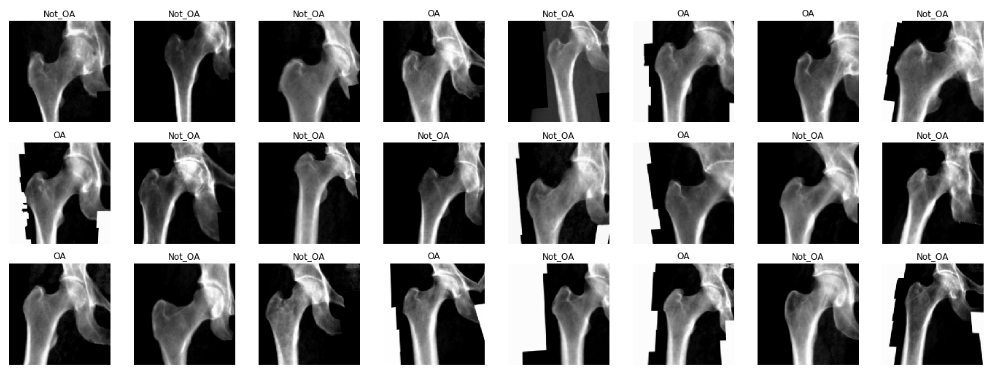

In [6]:
#learn = cnn_learner(dls, resnet152, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
#learn.fine_tune(5)

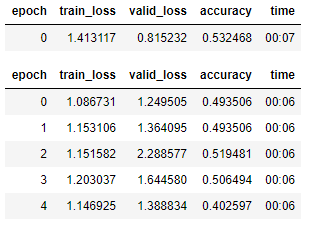

In [7]:
#learn.show_results(max_n=32, nrows=8)

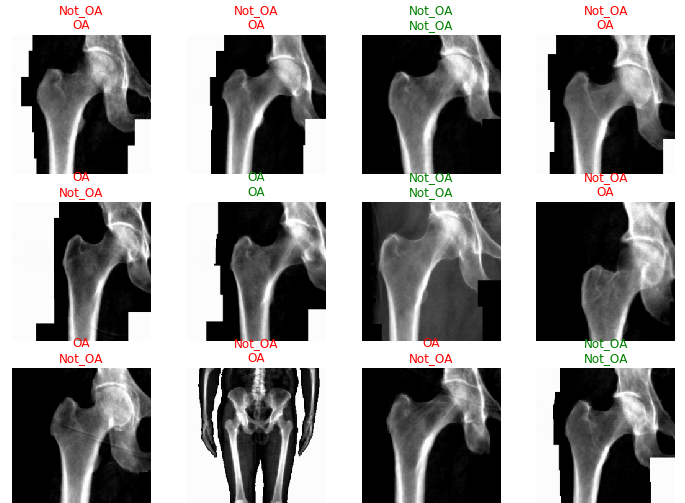

In [8]:
#interp = ClassificationInterpretation.from_learner(learn)
#losses,idxs = interp.top_losses()
#len(dls.valid_ds)==len(losses)==len(idxs)
#interp.plot_confusion_matrix(figsize=(7,7))

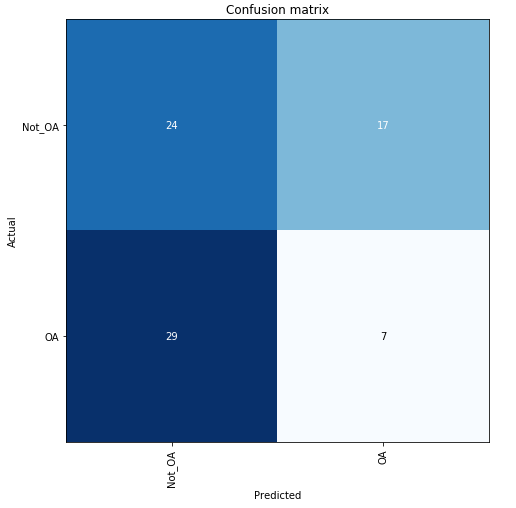

In [9]:
#interp.plot_top_losses(32, nrows=8)

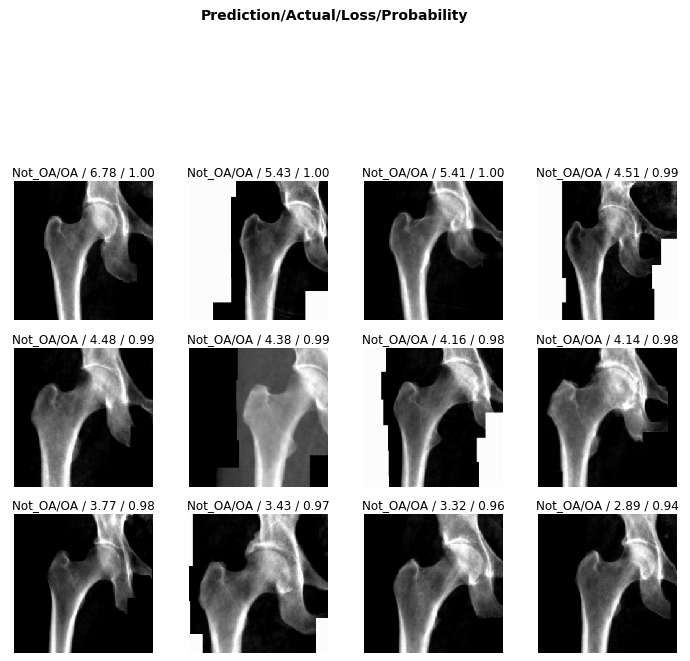

## What Went Wrong

Clearly, the classifier did not have a very high accuracy in determining hip OA based on hip X-rays. However, any trained doctor is generally able to diagnose hip OA based upon X-rays alone. One extremely noteable source of errors lies in the fact that the metadata obtained for each patient did not specify which hip had OA. OA typically only presents itself in a single hip for each patient, and without that information, some of these hip X-rays were misleading as they could be fully healthy and not the correct hip. Furthermore, it is possible that this image classification is not as overt as we originally thought. However, that does not explain the extremely low accuracy that my classifier generated after training. 

## Moving Forward

I made two more classifiers, one for left knees and one for spine X-rays following the exact same file structure layout and code as this classifier in order to see if there were any differences in accuracy. Without any meaningful OA diagnosis information, each classifier had about the same accuracy as this classifier, around 50%, no better than a coin flip. It was at this point that we decided to abandon the project for now, but the idea here could be broadly applied to different diseases and medical images.